In [ ]:
%matplotlib notebook

In [ ]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt
import mlsrose

In [8]:
def getTissuePositions(inputName, ouputName, gridSize,dx,dy):
    
    NoOfTissues = 1
    NoOfTissuesBottom = 0
    
    #--------------------------------------------------
    # generate grids
    #--------------------------------------------------
    grid = []
    for x in range(-gridSize, gridSize+1):
      for y in range(-gridSize, gridSize+1):
        if x % 2 == 0:
            grid.append((x*200, y*200))
        else:
            grid.append((x*200, -y*200))

    grid_R =  grid[::-1]
    grid = np.array(grid)
    grid_R = np.array(grid_R)
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    points = pd.read_csv(inputName, header = None, sep=',')
    print(inputName+ ' read!')
    print(str(points.shape[0]) + ' points found.')
    
    #---------------------------------------------------
    # Read input positions
    #---------------------------------------------------
    
    n = points.shape[0] #number of positions you selected for each slice to define the region of interest

    positions = np.empty((0,2))
    for i in range(0,NoOfTissuesBottom):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid_R + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))

    for i in range(NoOfTissuesBottom,NoOfTissues):
        tissue = geometry.Polygon(points.values[n*i:n*(i+1)])
        center = np.mean(points.values[n*i:n*(i+1)], axis = 0)
        grids = grid + center
        saved = np.empty((0,2))
        for j in range(0,len(grids)):
            area = [[grids[j][0]-100,grids[j][1]-100],[grids[j][0]-100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]+100],[grids[j][0]+100,grids[j][1]-100]]
            tile = geometry.Polygon([[p[0], p[1]] for p in area])
            if tissue.intersects(tile) == True:
                saved = np.concatenate((saved,np.array([grids[j]])), axis = 0)
        positions = np.concatenate((positions,saved))
        
    # add displacement between 10x and 60x objectives
    positions = positions + [dX,dY]
    
    return positions
        
    #---------------------------------------------------
    # save data
    #---------------------------------------------------
    np.savetxt(outputName, positions, delimiter=',')
    print(outputName+ ' saved!')
    print(str(positions.shape[0]) + ' positions generated.\n')
    

### Shared variables

In [9]:
gridSize = 50
basePath = 'F:/Data/Leonardo/210206_BC110_data/Settings/'
experimentName = 'BC110'

# Displacement of 60X objective respect to 10X


In [10]:
# in micrometers
dX = -259.6
dY = 18.4

### sample 01

In [11]:
sample = 1

# create grid for each section
inputName = f'{basePath}sample_0{sample}/boundary_positions.txt'
outputName = f'{basePath}sample_0{sample}/positions_{experimentName}_sample_0{sample}.txt'
positions = getTissuePositions(inputName,outputName,gridSize,dX,dY)

F:/Data/Leonardo/210206_BC110_data/Settings/sample_01/boundary_positions.txt read!
154 points found.


In [12]:
positions

array([[-7485.96337662,  2375.45571429],
       [-7485.96337662,  2575.45571429],
       [-7485.96337662,  2775.45571429],
       ...,
       [ 3314.03662338,  8975.45571429],
       [ 3314.03662338,  9175.45571429],
       [ 3314.03662338,  9375.45571429]])

In [14]:
# organize the positions based on traveler salesman problem
import mlsrose


ModuleNotFoundError: No module named 'mlsrose'

<IPython.core.display.Javascript object>


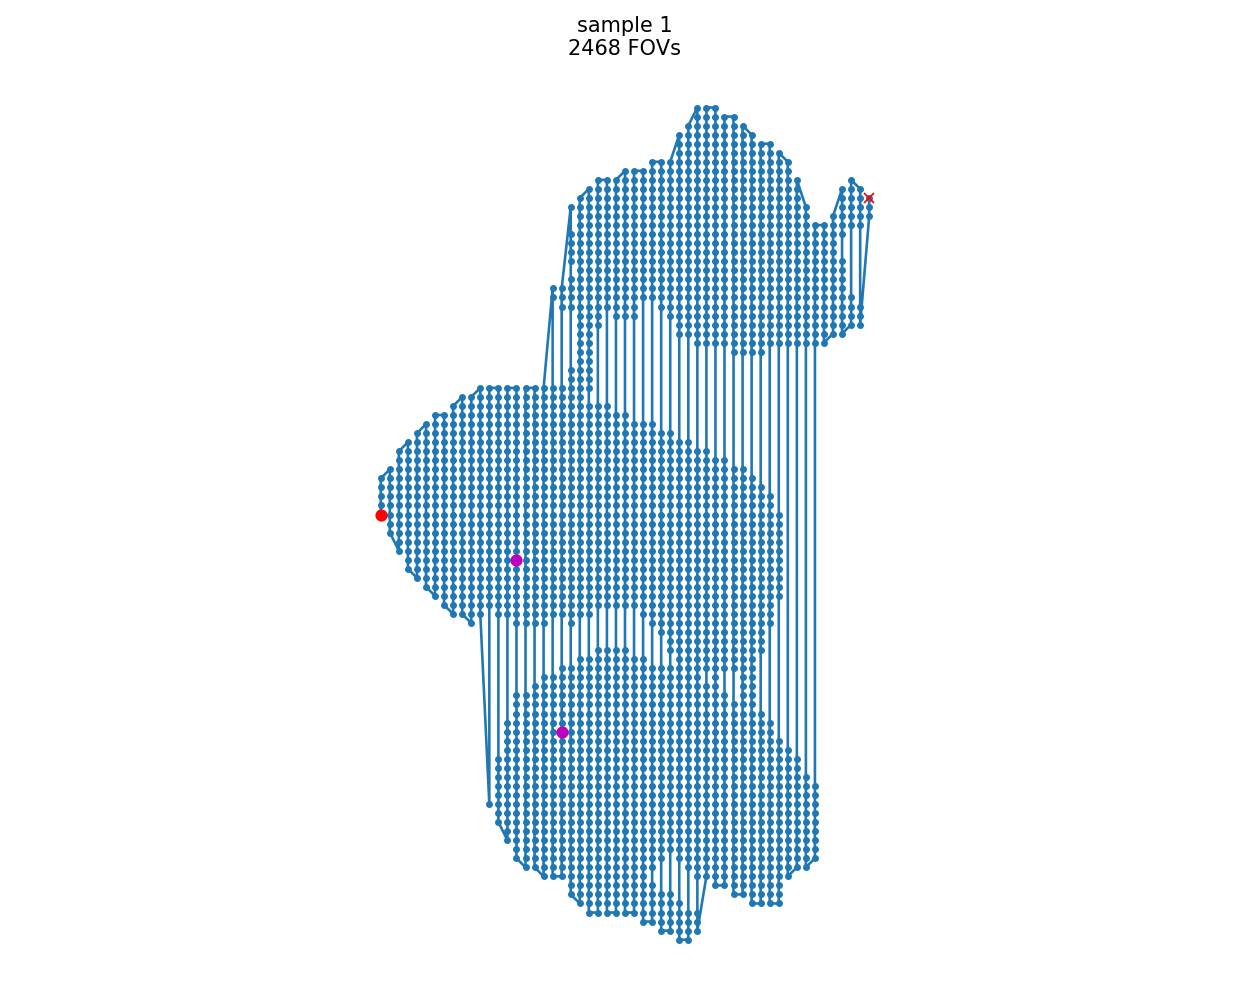

In [7]:
## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
ax.plot(positions.X[339],positions.Y[339],'mo')
ax.plot(positions.X[578],positions.Y[578],'mo')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

I will remove the first 12 positions

### sample 02

In [ ]:
sample = 2

# create grid for each section
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/boundary_positions_{ii}.txt'
    outputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    getTissuePositions(inputName,outputName,gridSize)
    
# combine positions into single file
df = pd.DataFrame()
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    positions = pd.read_csv(inputName, header = None, sep=',')
    df = df.append(positions,ignore_index = True)

    
# shift positions to match 60X objective
df[0] = df[0] + dX
df[1] = df[1] + dY

outputName = f'{basePath}sample_0{sample}/positions_{experimentName}_sample_0{sample}.txt'
np.savetxt(outputName, df, delimiter=',')
print(outputName+ ' saved!')
print(str(df.shape[0]) + ' positions generated.') 

## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
# ax.plot(positions.X[339],positions.Y[339],'mo')
# ax.plot(positions.X[578],positions.Y[578],'mo')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    


### sample 03

In [ ]:
sample = 3

# create grid for each section
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/boundary_positions_{ii}.txt'
    outputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    getTissuePositions(inputName,outputName,gridSize)
    
# combine positions into single file
df = pd.DataFrame()
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    positions = pd.read_csv(inputName, header = None, sep=',')
    df = df.append(positions,ignore_index = True)

    
# shift positions to match 60X objective
df[0] = df[0] + dX
df[1] = df[1] + dY

outputName = f'{basePath}sample_0{sample}/positions_{experimentName}_sample_0{sample}.txt'
np.savetxt(outputName, df, delimiter=',')
print(outputName+ ' saved!')
print(str(df.shape[0]) + ' positions generated.') 

## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
# ax.plot(positions.X[339],positions.Y[339],'mo')
# ax.plot(positions.X[578],positions.Y[578],'mo')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

### sample 04

In [ ]:
sample = 4

# create grid for each section
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/boundary_positions_{ii}.txt'
    outputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    getTissuePositions(inputName,outputName,gridSize)
    
# combine positions into single file
df = pd.DataFrame()
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    positions = pd.read_csv(inputName, header = None, sep=',')
    df = df.append(positions,ignore_index = True)

    
# shift positions to match 60X objective
df[0] = df[0] + dX
df[1] = df[1] + dY

outputName = f'{basePath}sample_0{sample}/positions_{experimentName}_sample_0{sample}.txt'
np.savetxt(outputName, df, delimiter=',')
print(outputName+ ' saved!')
print(str(df.shape[0]) + ' positions generated.') 

## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
# ax.plot(positions.X[339],positions.Y[339],'mo')
# ax.plot(positions.X[578],positions.Y[578],'mo')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

### sample 05

In [ ]:
sample = 5

# create grid for each section
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/boundary_positions_{ii}.txt'
    outputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    getTissuePositions(inputName,outputName,gridSize)
    
# combine positions into single file
df = pd.DataFrame()
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    positions = pd.read_csv(inputName, header = None, sep=',')
    df = df.append(positions,ignore_index = True)

    
# shift positions to match 60X objective
df[0] = df[0] + dX
df[1] = df[1] + dY

outputName = f'{basePath}sample_0{sample}/positions_{experimentName}_sample_0{sample}.txt'
np.savetxt(outputName, df, delimiter=',')
print(outputName+ ' saved!')
print(str(df.shape[0]) + ' positions generated.') 

## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
# ax.plot(positions.X[339],positions.Y[339],'mo')
# ax.plot(positions.X[578],positions.Y[578],'mo')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

### sample 06

In [ ]:
sample = 6

# create grid for each section
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/boundary_positions_{ii}.txt'
    outputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    getTissuePositions(inputName,outputName,gridSize)
    
# combine positions into single file
df = pd.DataFrame()
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    positions = pd.read_csv(inputName, header = None, sep=',')
    df = df.append(positions,ignore_index = True)

    
# shift positions to match 60X objective
df[0] = df[0] + dX
df[1] = df[1] + dY

outputName = f'{basePath}sample_0{sample}/positions_{experimentName}_sample_0{sample}.txt'
np.savetxt(outputName, df, delimiter=',')
print(outputName+ ' saved!')
print(str(df.shape[0]) + ' positions generated.') 

## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
# ax.plot(positions.X[339],positions.Y[339],'mo')
# ax.plot(positions.X[578],positions.Y[578],'mo')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    

### sample 07

In [ ]:
sample = 7

# create grid for each section
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/boundary_positions_{ii}.txt'
    outputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    getTissuePositions(inputName,outputName,gridSize)
    
# combine positions into single file
df = pd.DataFrame()
for ii in range(2):
    inputName = f'{basePath}sample_0{sample}/bulk_positions_{ii}.txt'
    positions = pd.read_csv(inputName, header = None, sep=',')
    df = df.append(positions,ignore_index = True)

    
# shift positions to match 60X objective
df[0] = df[0] + dX
df[1] = df[1] + dY

outputName = f'{basePath}sample_0{sample}/positions_{experimentName}_sample_0{sample}.txt'
np.savetxt(outputName, df, delimiter=',')
print(outputName+ ' saved!')
print(str(df.shape[0]) + ' positions generated.') 

## Display positions
                              
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))    
        
# load positions file
positions = pd.read_csv(outputName, header=None, names=('X','Y'))
    
# plot positions
ax.plot(positions.X,positions.Y,'.-')
# ax.plot(positions.X[339],positions.Y[339],'mo')
# ax.plot(positions.X[578],positions.Y[578],'mo')
ax.plot(positions.X.iloc[0],positions.Y.iloc[0],'ro')
ax.plot(positions.X.iloc[-1],positions.Y.iloc[-1],'rx')
#for i in range(positions.shape[0]):
#    ax.text(positions.X[i],positions.Y[i],str(i),fontsize=6)
    
ax.set_title('sample ' + str(sample) + '\n' + str(positions.shape[0]) + ' FOVs')
ax.axis('equal')
    
ax.axis('off')
fig.tight_layout()    